In [1]:
print('mid July')

mid July


In [50]:
#Import the relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import statsmodels.api as sm
from sklearn import decomposition, preprocessing, model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")


### Loading the DataFrame

In [3]:
df = pd.read_csv('C:\\Users\\biwot\\OneDrive\\Desktop\\zed\\phase_2\\Phase-2-Group-17-Project\\data\\kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21597, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### Data Cleaning

We begin by fixing datatypes. The date column is an object datatype, perhaps it should be a datetime . 

In [6]:
#converting date datatype
df['date'] = pd.to_datetime(df['date'])

#converting sqft_basement datatype
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [7]:
#checking for missing values in the dataset
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Alot of columns have missing values on the waterfront and yr_renovated columns. 

In [8]:
#drop the missing values
df=df.dropna()

In [9]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Data processing
Let us take a deeper look at each column's summary statistics and see if there are any misreported observations.


In [10]:
# We first want to check for any null or missing values across the Dataframe.
df.count()

id               15429
date             15429
price            15429
bedrooms         15429
bathrooms        15429
sqft_living      15429
sqft_lot         15429
floors           15429
waterfront       15429
view             15429
condition        15429
grade            15429
sqft_above       15429
sqft_basement    15429
yr_built         15429
yr_renovated     15429
zipcode          15429
lat              15429
long             15429
sqft_living15    15429
sqft_lot15       15429
dtype: int64

In [11]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.542900e+04,15429,1.542900e+04,15429.000000,15429.000000,15429.00000,1.542900e+04,15429.000000,15429.000000,15429.000000,...,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.00000,15429.000000,15429.000000
mean,4.593825e+09,2014-10-28 21:27:57.853392896,5.414978e+05,3.378767,2.121508,2085.51656,1.528616e+04,1.494556,0.007518,0.228855,...,7.664204,1793.705230,291.811329,1971.130533,81.766544,98077.472098,47.559260,-122.21351,1990.926891,12862.281159
min,1.000102e+06,2014-05-02 00:00:00,8.200000e+04,1.000000,0.500000,370.00000,5.200000e+02,1.000000,0.000000,0.000000,...,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.51900,399.000000,659.000000
25%,2.126049e+09,2014-07-21 00:00:00,3.200000e+05,3.000000,1.750000,1430.00000,5.050000e+03,1.000000,0.000000,0.000000,...,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469100,-122.32800,1490.000000,5100.000000
50%,3.905082e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1920.00000,7.620000e+03,1.500000,0.000000,0.000000,...,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571100,-122.22900,1850.000000,7626.000000
75%,7.334501e+09,2015-02-17 00:00:00,6.435000e+05,4.000000,2.500000,2550.00000,1.072000e+04,2.000000,0.000000,0.000000,...,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.677600,-122.12400,2370.000000,10108.000000
max,9.895000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.00000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.31500,6210.000000,871200.000000
std,2.874791e+09,NaN,3.730219e+05,0.934200,0.767027,919.54924,4.199737e+04,0.538903,0.086384,0.759902,...,1.173757,829.165362,443.366153,29.287947,395.668685,53.459610,0.138745,0.14048,684.796238,27783.533647


In [12]:
df[df.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


Some of these values don't make a lot of sense in the context of house sales. For example, it should not be possible to sell a house with 0 bathrooms. Additionally,  a house with 33 bedrooms but only 1.75 bathrooms on 1620 square feet doesn't sound right.

In [13]:
df = df.drop(df[df.bedrooms == 33].index)
df = df.drop(df[df.bathrooms == 0].index)

df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.542800e+04,15428,1.542800e+04,15428.000000,15428.000000,15428.000000,1.542800e+04,15428.000000,15428.000000,15428.000000,...,15428.000000,15428.000000,15428.000000,15428.000000,15428.000000,15428.000000,15428.000000,15428.000000,15428.000000,15428.000000
mean,4.593967e+09,2014-10-28 21:39:42.888255232,5.414914e+05,3.376847,2.121532,2085.546733,1.528676e+04,1.494588,0.007519,0.228870,...,7.664247,1793.754083,291.792650,1971.132097,81.771843,98077.470443,47.559251,-122.213502,1990.969730,12862.810215
min,1.000102e+06,2014-05-02 00:00:00,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,...,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.125889e+09,2014-07-21 00:00:00,3.200000e+05,3.000000,1.750000,1430.000000,5.050000e+03,1.000000,0.000000,0.000000,...,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.750000,47.469075,-122.328000,1490.000000,5100.000000
50%,3.905086e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,...,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571100,-122.229000,1850.000000,7626.000000
75%,7.334501e+09,2015-02-17 00:00:00,6.436125e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,...,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.677525,-122.124000,2370.000000,10108.250000
max,9.895000e+09,2015-05-27 00:00:00,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.874830e+09,NaN,3.730332e+05,0.903276,0.767046,919.571405,4.199866e+04,0.538906,0.086387,0.759924,...,1.173783,829.170029,443.374451,29.288252,395.680961,53.460948,0.138746,0.140482,684.797756,27784.356395


It is worth to note that it is not guaranteed that each observation is for a unique house. It may be the case that a house was sold several times between the period the data was collected. This may later introduce bias into modelling.

In [14]:
#Checking for duplicate data
#df[df.duplicated(subset=['id'], keep=False)].sort_values('id')

In [15]:
#df = df.drop_duplicates(['id'], keep='last', inplace = True)

### EDA

In [16]:
df.corr()['price'].sort_values()

zipcode         -0.049380
id              -0.014942
date            -0.000426
long             0.021963
condition        0.033137
yr_built         0.050543
sqft_lot15       0.080574
sqft_lot         0.084692
yr_renovated     0.120985
floors           0.260166
waterfront       0.275720
lat              0.306984
bedrooms         0.315711
sqft_basement    0.320047
view             0.397793
bathrooms        0.525669
sqft_living15    0.583435
sqft_above       0.612407
grade            0.664374
sqft_living      0.706515
price            1.000000
Name: price, dtype: float64

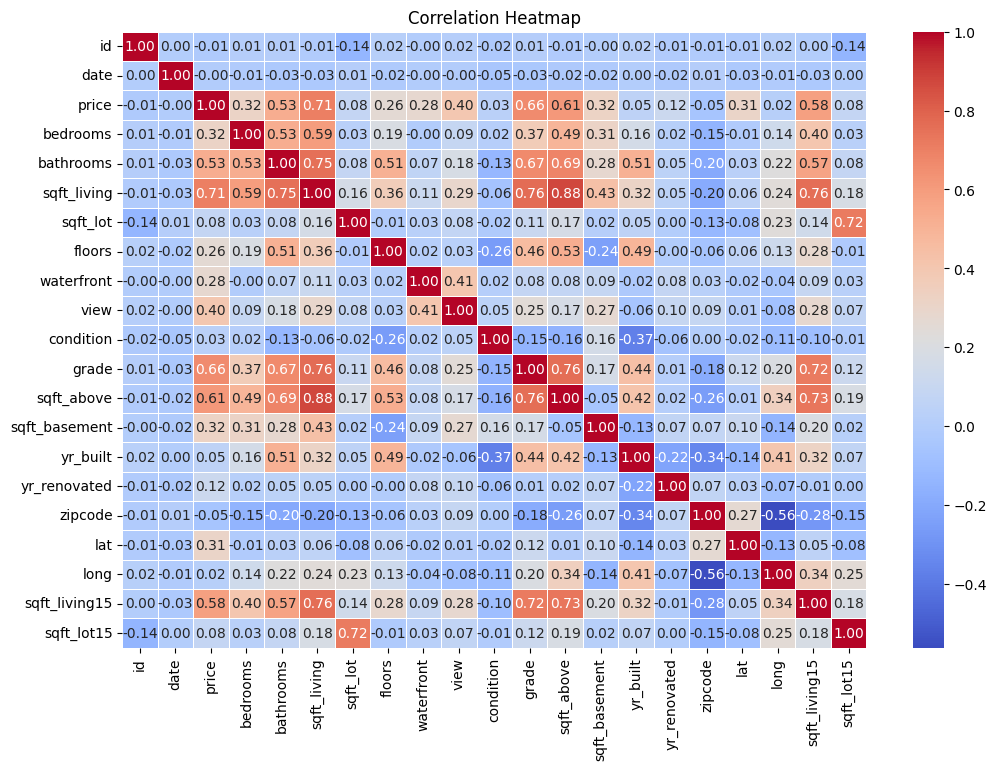

In [17]:
#Drop the 'price' column to investigate our features
features = df.drop('price', axis=1)
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

#### Investigation into Normality

A major assumption of linear regression is that continous variables have a normal distribution.

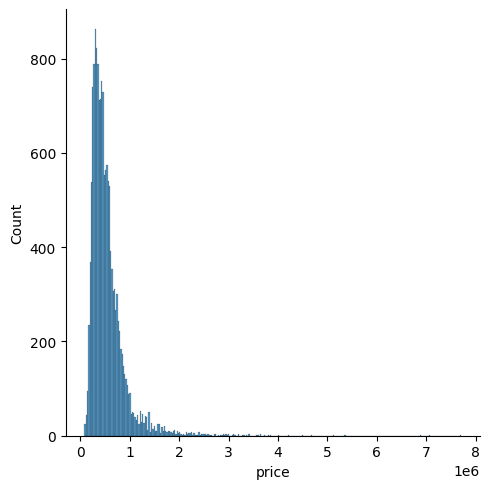

In [18]:
sns.displot(df.price);

The data has a positive skewness. This suggests that, on the more expensive side of houses, there's a large variety in the prices of houses. We would have to do log transformation in order to normalize our target variable; price  to give it a more symmetric as a result. 

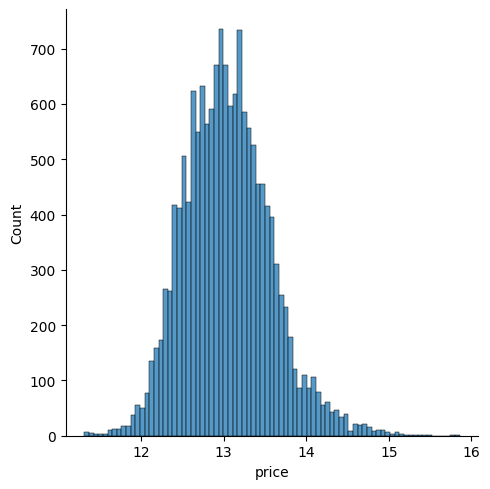

In [19]:
df.price = np.log(df.price)
sns.displot(df.price);

#### Hypothesis testing
Based on no underlying assumptions I will drop a few columns which I think won't impact the performance of my predictions.

In [20]:
test1 = df.drop(["id", "date", "yr_renovated", "waterfront", "lat", "long", "zipcode"], axis=1)
test1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
1,13.195614,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1690,7639
3,13.311329,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,1360,5000
4,13.142166,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,1800,7503
5,14.022525,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,4760,101930
8,12.343658,3,1.00,1780,7470,1.0,0.0,3,7,1050,730.0,1960,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,13.071070,3,2.50,1310,1294,2.0,0.0,3,8,1180,130.0,2008,1330,1265
21592,12.793859,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,1530,1509
21593,12.899220,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,1830,7200
21594,12.904459,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,1020,2007


One linear regression assumption is that input variables are independent from one another. We can verify this, by creating a correlation matrix to view the relationship between our features.

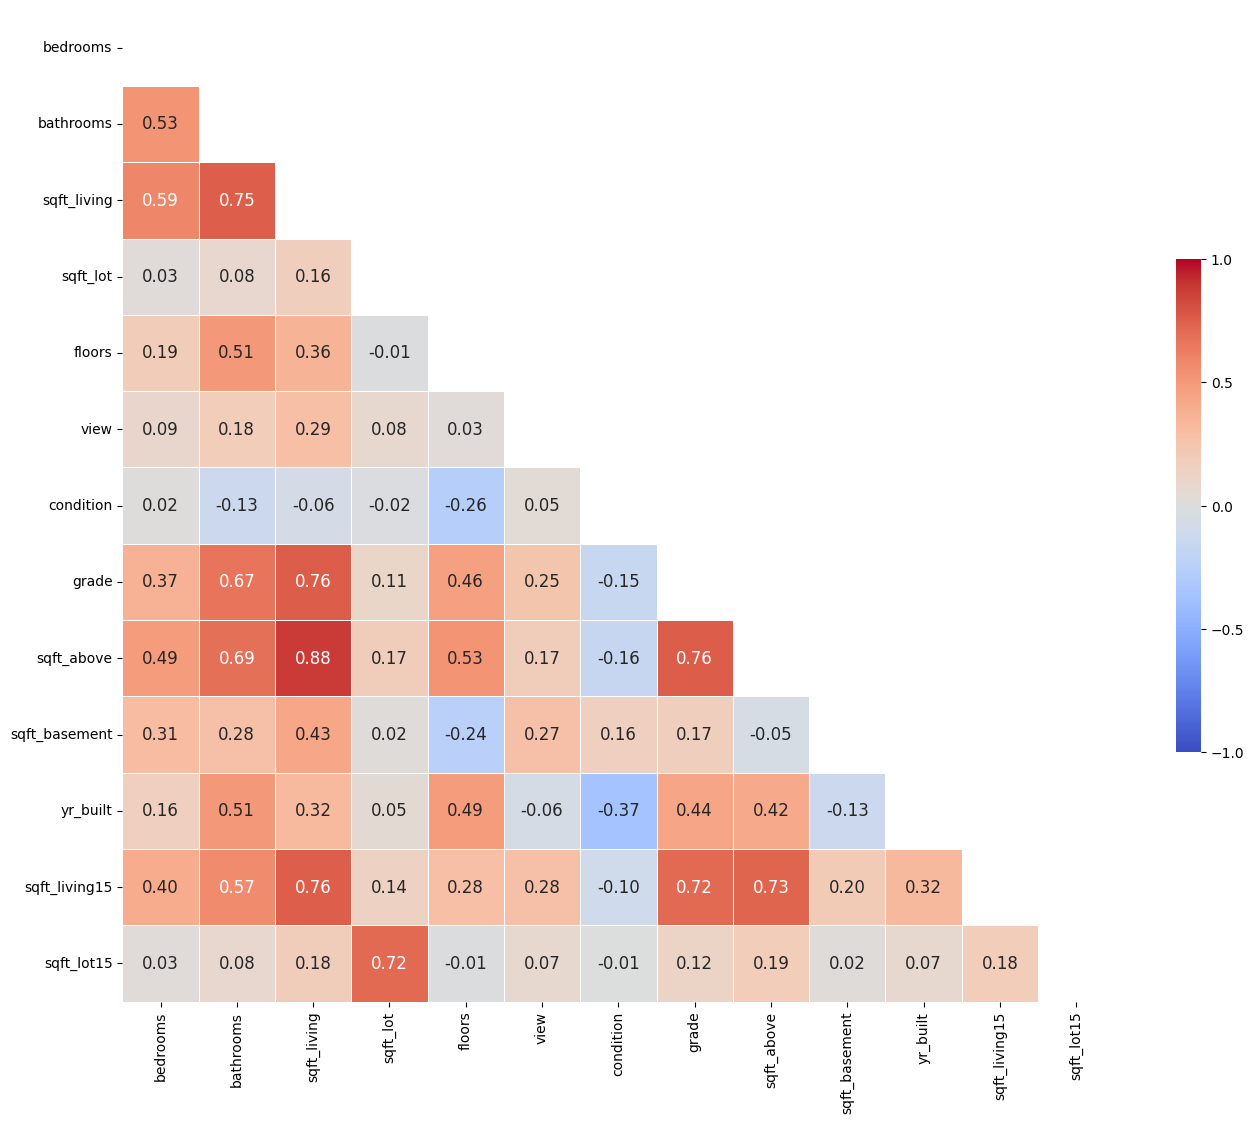

In [21]:
f, ax = plt.subplots(figsize=(16, 16)) 

corrMatrix = test1.drop("price",axis=1).corr()
mask = np.zeros_like(corrMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(corrMatrix, mask=mask,square = True,linewidths = .5,cmap = "coolwarm",cbar_kws = {'shrink': .4, 
        "ticks" : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {"size": 12},fmt = ".2f")

ax.set_yticklabels(corrMatrix.columns, rotation = 0)
ax.set_xticklabels(corrMatrix.columns)
plt.show();

The intensity of the color matches the strength of the correlation.
It looks like some of our variables are collinear(The rule of thumb is that if two independent variables have a high Pearson’s correlation, then we can say that both independent variables are highly correlated with each other and thus collinear.), which breaks the assumptions required for linear regression.

To create independent inputs for our model, we will use PCA to provide the added benefit of reducing the number of input variables for our model. 

In [22]:
#Standardize our input data in order to maximize variance and the effect of PCA
test1_ = test1.drop(["price"], axis=1)
test2 = preprocessing.StandardScaler().fit_transform(test1_.values)

pca = decomposition.PCA(n_components=.85)
components = pca.fit_transform(test2)
pca_df = pd.DataFrame(data = components, columns=["PC"+str(i) for i in range(1, components.shape[1]+1) ])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.052629,-0.462585,-0.183337,0.028200,-0.142666,-0.046051,0.536536
1,-0.794517,1.942186,-1.316455,-1.574398,0.081733,1.795681,-0.447292
2,-0.582193,-0.752774,0.206766,0.201726,-0.414932,-0.534675,-0.528202
3,7.254027,3.066012,2.061075,-0.678380,-1.577781,-1.292282,-2.489929
4,-1.727239,0.569603,-0.197983,0.282292,-1.171228,-0.659347,-0.367621
...,...,...,...,...,...,...,...
15423,-0.359397,-1.841077,-0.057765,0.221866,-0.639585,1.278353,-0.165580
15424,0.458367,-2.722284,0.064260,0.281264,0.071977,1.742051,0.366474
15425,1.246302,-1.664917,-0.013743,-0.377736,-0.278909,0.466133,0.386244
15426,-2.238796,-2.171356,0.551638,0.848607,-0.269618,0.885716,-0.411377


PCA transforms our original dataframe using a weight matrix which indicates the importance of each input variables in creating each principal component. 

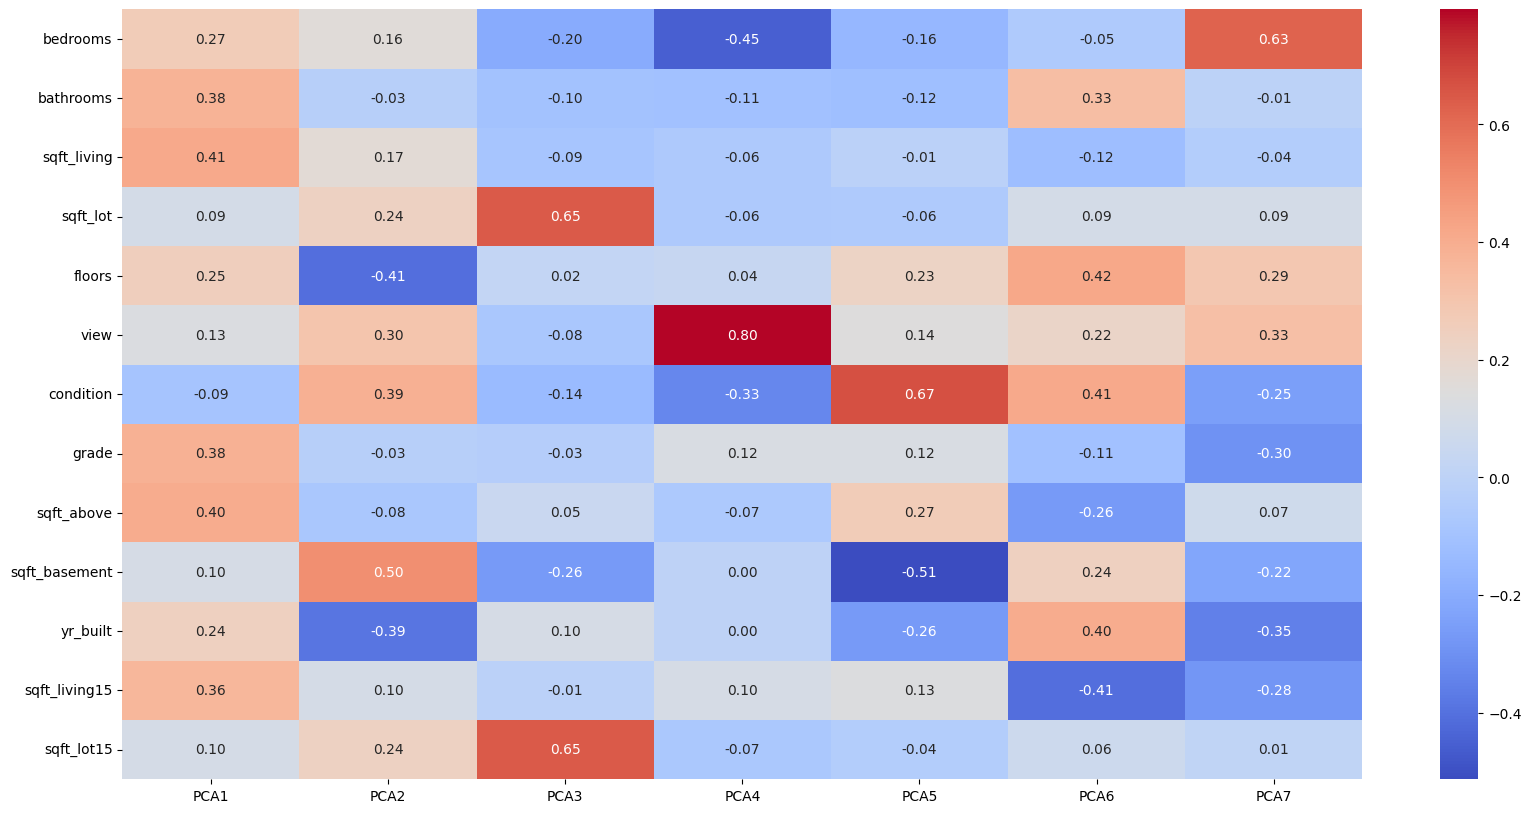

In [23]:
#Heat map of the PCA
f, ax = plt.subplots(figsize=(20, 10)) 

sns.heatmap(pca.components_.T, cmap = "coolwarm", yticklabels=test1.drop("price", axis=1).columns,
                xticklabels=[ "PCA"+str(x) for x in range(1,components.shape[1]+1)],annot = True,fmt = ".2f")
plt.show();

sqft_lot and sqft_lot15 have high correlation and can be explained by a single principal component.

We split our data into a training and testing sets to test the model.
We pose a null hypothesis that: there is no relationship between house pricing and our principal components.

In [24]:
X_pca = pca_df
y = df["price"].rename("Log of Actual Price")

X_pca_train, X_pca_test, y_pca_train, y_pca_test = model_selection.train_test_split(X_pca, y)

y_pca_train = y_pca_train.transform(np.log)
y_pca_test = y_pca_test.transform(np.log)

X_pca_train = sm.add_constant(X_pca_train)
X_pca_test = sm.add_constant(X_pca_test)

# Linear Regression on Principal Components
pca_est = sm.OLS(list(y_pca_train), X_pca_train).fit()
print("Using PCA:")
print(pca_est.summary())
y_pca_pred = pca_est.predict(X_pca_test)
y_pca_pred = y_pca_pred.rename("Log of Predicted Price")

Using PCA:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     2225.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:44:56   Log-Likelihood:                 25769.
No. Observations:               11571   AIC:                        -5.152e+04
Df Residuals:                   11563   BIC:                        -5.146e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5679      0.000   1.06e+

In [25]:
# Print the P-value for each coefficient
print(pca_est.summary2().tables[1]['P>|t|'])

const     0.000000e+00
PC1       0.000000e+00
PC2      1.207209e-287
PC3       4.472663e-92
PC4       2.338097e-75
PC5      1.088945e-162
PC6       4.596364e-42
PC7       1.619918e-16
Name: P>|t|, dtype: float64


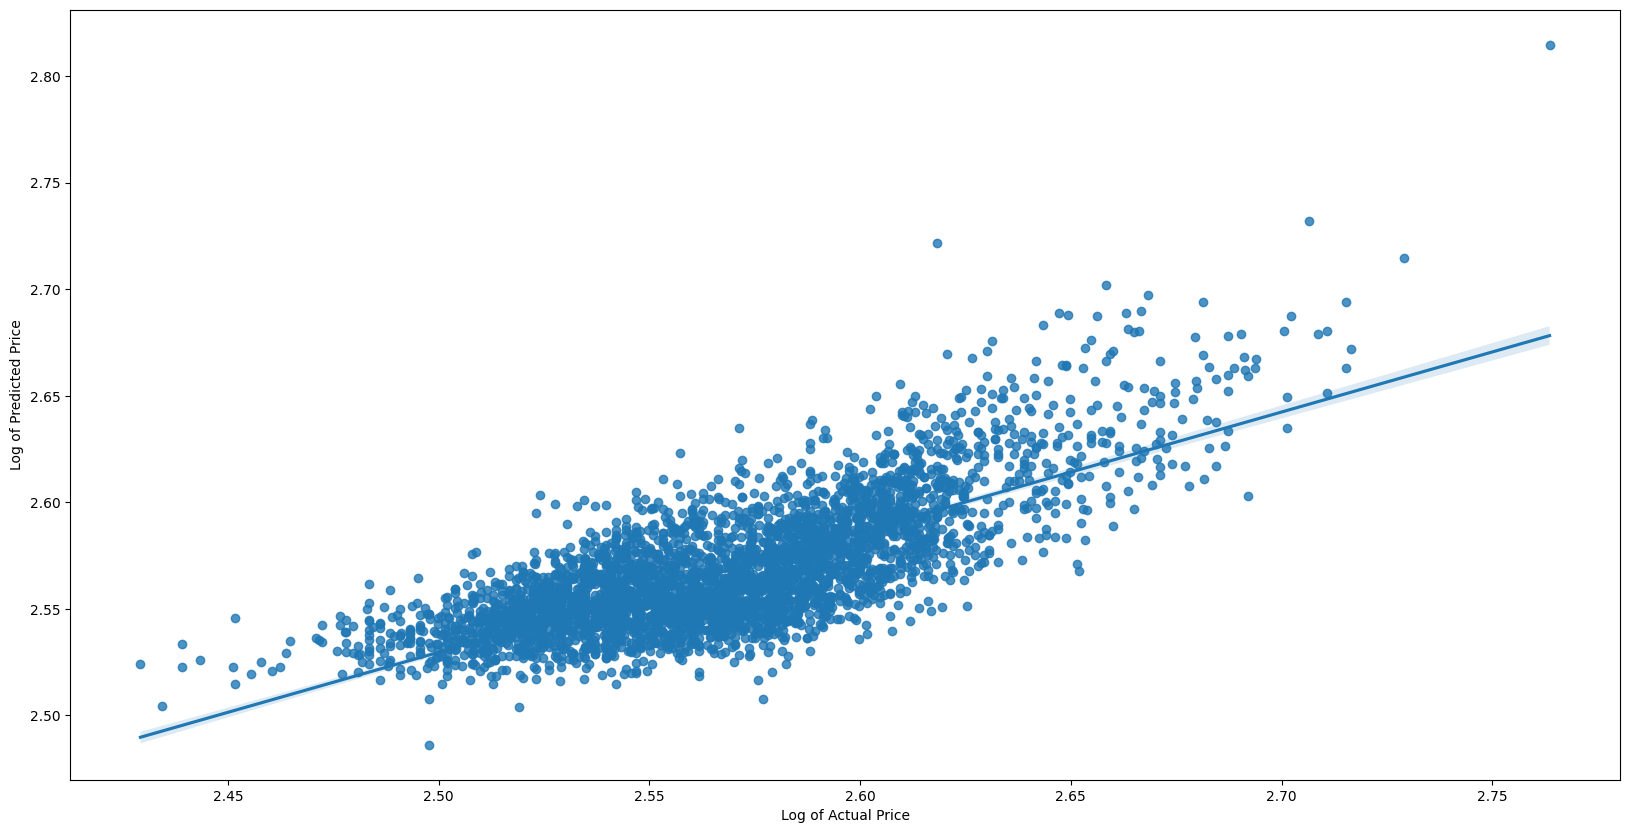

In [26]:
# Plot prediction versus real value scatterplot
f, ax = plt.subplots(figsize=(20, 10)) 
sns.regplot(x=y_pca_test, y =y_pca_pred)
plt.show();

We are able to reject the null hypothesis that there is no relationship between house prices and our principal components. Each principal component has a coefficient with P-Value significantly less than alpha = 0.01 which means that our predictors have an effect on the dependent variable.

Our coefficient of determination (R**2) is 0.581, which means that more than 40% of the variance in housing prices cannot be explained by the selected principal components or in turn the original input features. 

### Investigating house attributes to see which ones have more effect on our target variable price

Determining which attributes have the biggest impact on price will help shape our approach to predictive modelling and also give  a sense of which type of houses to focus on

In [27]:
# Create a copy of df to manipulate
df_1 = df.copy()

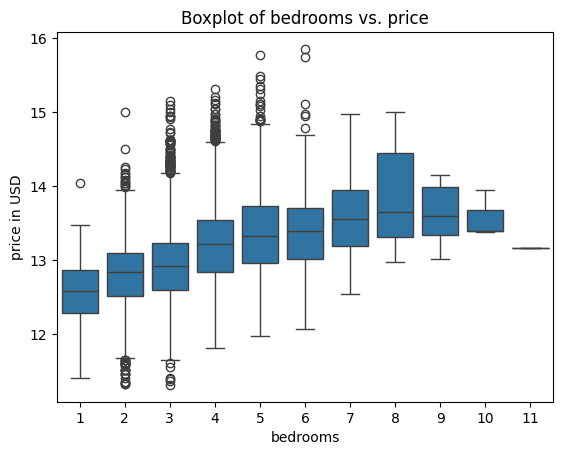

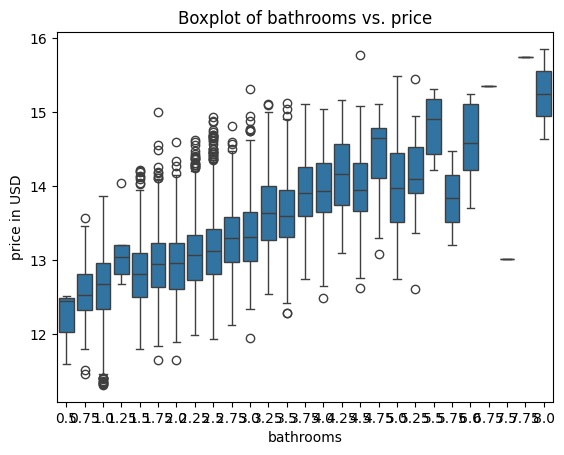

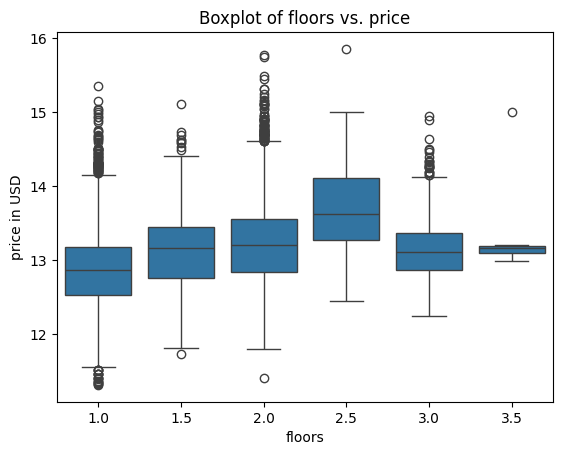

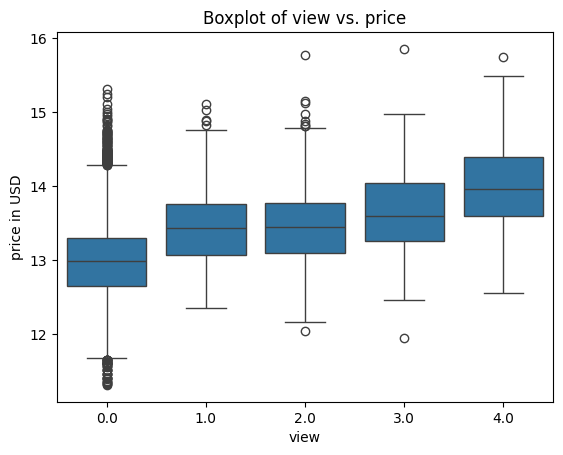

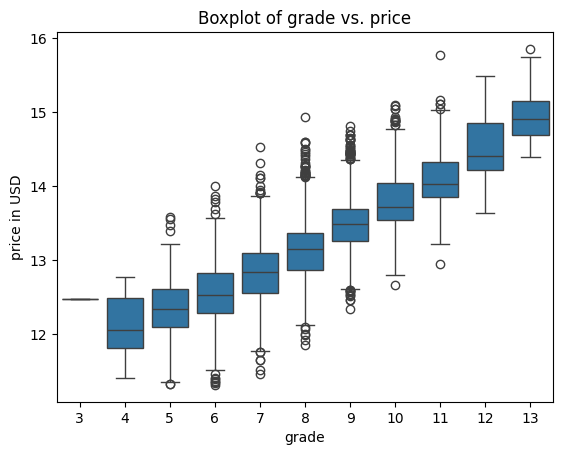

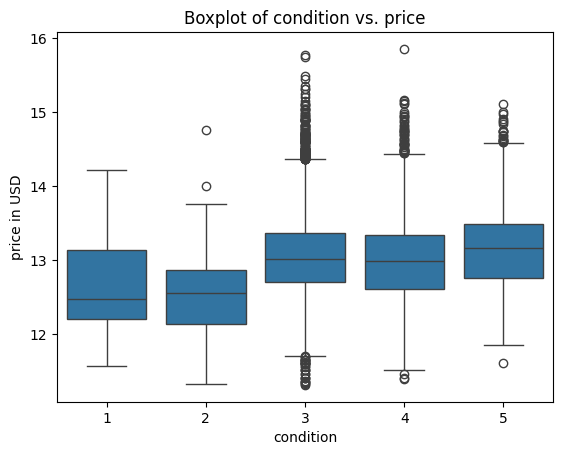

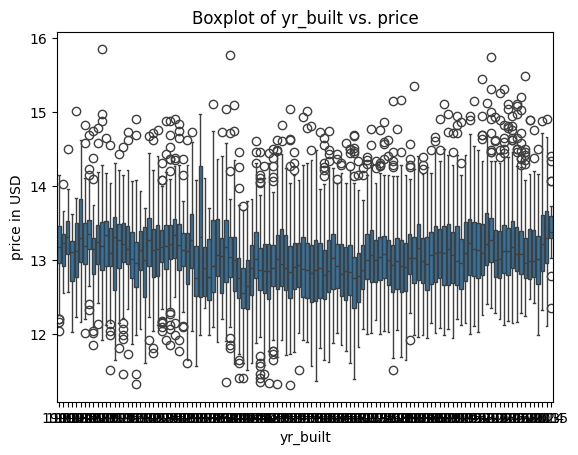

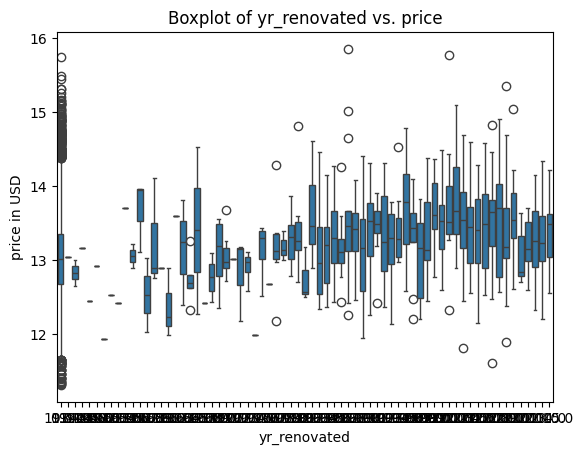

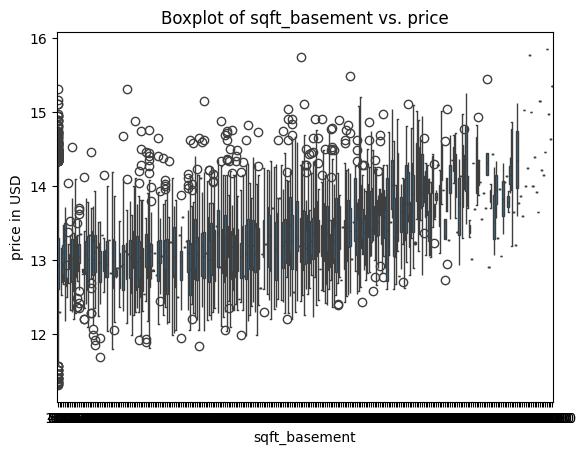

In [32]:
#initial understanding of the categorical features' relationship with price
# Define categorical variables
catvar = ['bedrooms', 'bathrooms', 'floors', 'view', 'grade', 'condition', 
            'yr_built', 'yr_renovated', 'sqft_basement']

# Plot boxplots
for feature in catvar:
    sns.boxplot(x = df_1[feature], y = df_1['price'])
    plt.title(f"Boxplot of {feature} vs. price")
    plt.ylabel("price in USD")
    plt.xlabel(f"{feature}")
    plt.show();

##### observations
-It is immediately apparent that as bedrooms and bathrooms increase, so does the house's selling price

-More floors is preferable up to 2.5 however a house with 3 floors has a lower median price.

-Grade looks to be a good predictor of price and worth exploring further

-View has a significant impact on price with higher view having higher prices

-Year_built appears to be a poor indicator of price



#### Lot sizes
We will define a ratio of sqft_living over sqft_lot to understand if there is an ideal trade-off between lot size (presumably garden) and living space

In [33]:
# Defining the ratio 
df_1['living_per_lot']= df_1['sqft_living']/df_1['sqft_lot']

In [34]:
# Describing ratio
df_1['living_per_lot'].describe()

count    15428.000000
mean         0.323215
std          0.268887
min          0.000610
25%          0.156425
50%          0.247846
75%          0.405047
max          4.653846
Name: living_per_lot, dtype: float64

It is surprising to see values over 1, as we would imagine sqft_living to always be smaller than sqft_lot. This could be possibly be outliers. We will exclude them from our dataset for the purpose of our analysis.

In [35]:
# Get number of houses with ratio over 1
len(df_1[df_1['living_per_lot'] >1])

564

In [36]:
# Set dfq2 to only have houses with ratio less than 1
df_1 = df_1[df_1['living_per_lot'] < 1]

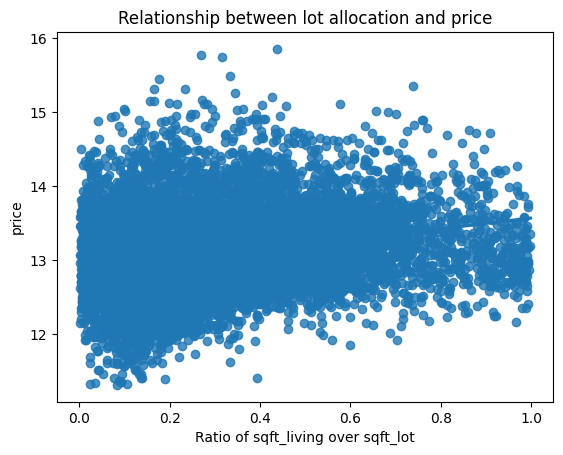

In [38]:
# Regplot of ratio over price
sns.regplot(x = df_1['living_per_lot'], y = df_1['price'], data = df_1)
plt.title('Relationship between lot allocation and price')
plt.xlabel('Ratio of sqft_living over sqft_lot')
plt.show();

There does not appear to be a clear relationship between the ratio and price. This indicates that there is unlikely to be an ideal area to allocate to living space within a plot. Also, a small house, without a garden but in a desirable location may commend a higher price than a house with a large garden in an inferior location.

#### Grade

In [39]:
df_1['grade'].unique()

array([ 7,  8, 11,  9,  6,  5, 10, 12,  4,  3, 13])

Grades run from grade 1 to 13. 1 being short of minimum building standards and 13 is generally custom designed and built, mansion level with large amount of highest quality work.

In [40]:
# Get summary statistics
df_1['grade'].describe()

count    14864.000000
mean         7.651978
std          1.185048
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

We note that the median grade is 7, which matches the description of being average. 

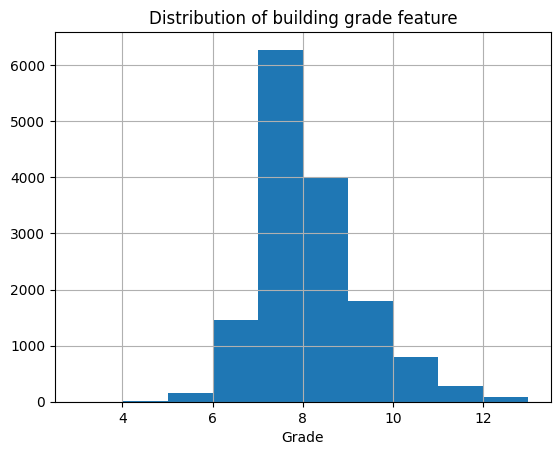

In [41]:
# Plot grade distribution
df_1['grade'].hist()
plt.title('Distribution of building grade feature')
plt.xlabel('Grade')
plt.show();

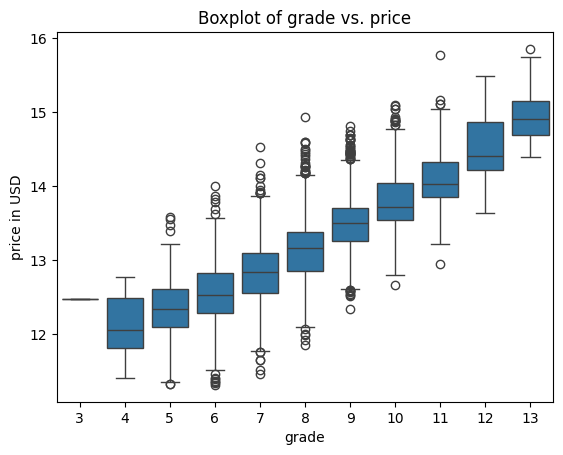

In [42]:
sns.boxplot(x = df_1['grade'], y = df_1['price'])
plt.title("Boxplot of grade vs. price")
plt.ylabel("price in USD")
plt.xlabel("grade")
plt.show();

Building grade looks to be normally distributed. The median house price increases with grade indicating that these features are positively correlated.

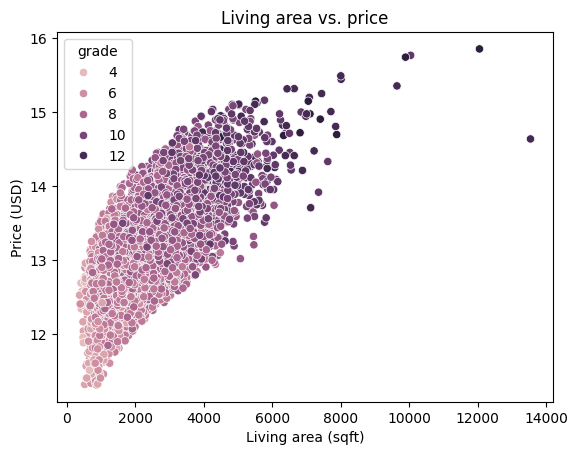

In [43]:
# Scatter plot of sqft living vs price with hue grade
sns.scatterplot(x = df_1['sqft_living'], y = df_1['price'], hue = df_1['grade'], data = df_1)
plt.title('Living area vs. price')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show();

The lower grade houses also have a small square footage.Once a house has a living area of at least 2,500 sqft, it is most likely to be average or above-average in terms of grade.

#### Investigate linearity assumption
We would like to investigate the relationship between our target variable price and the continuous feature variables in our dataset. 

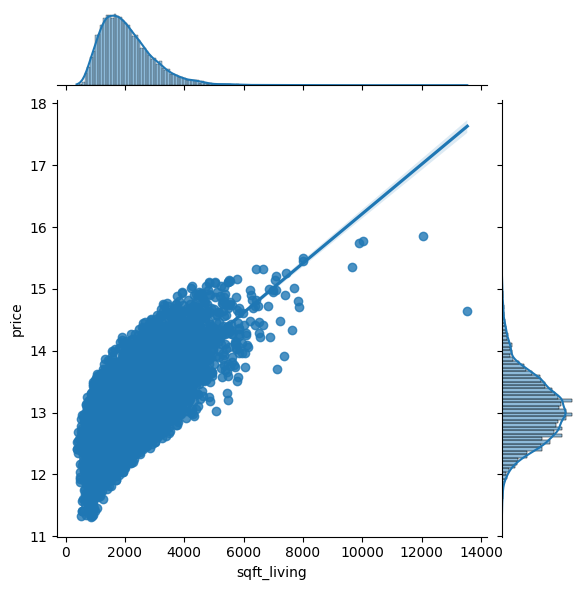

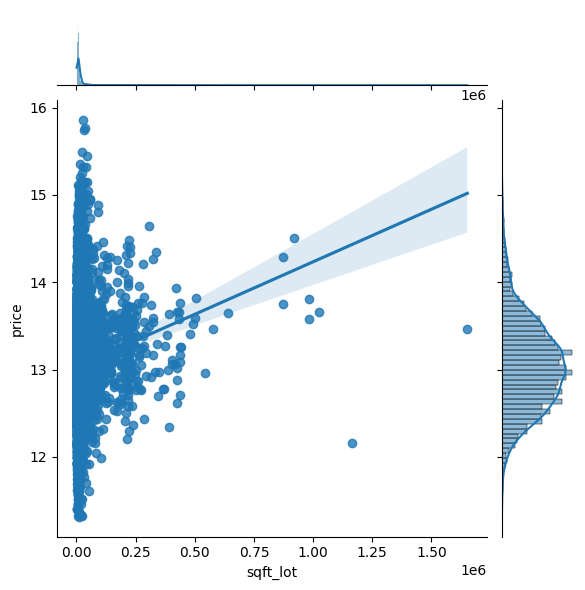

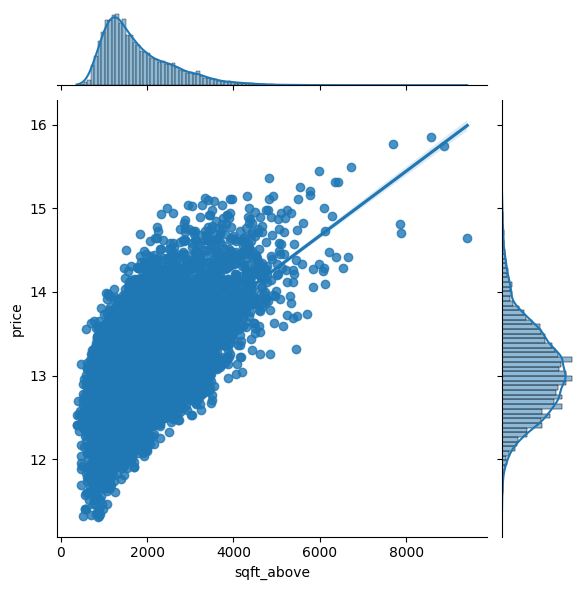

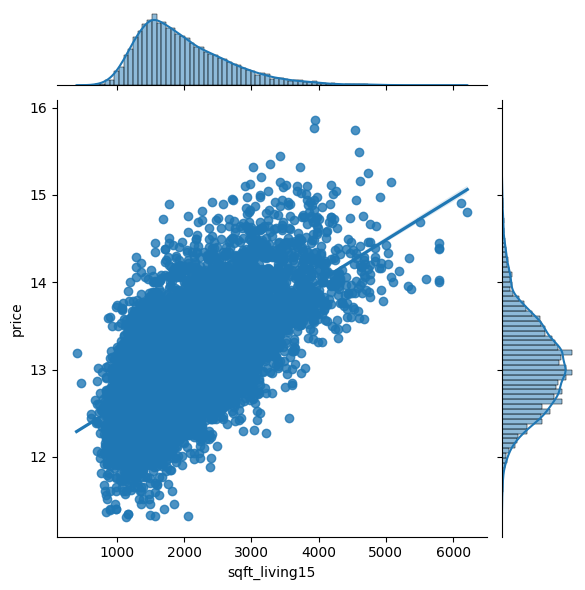

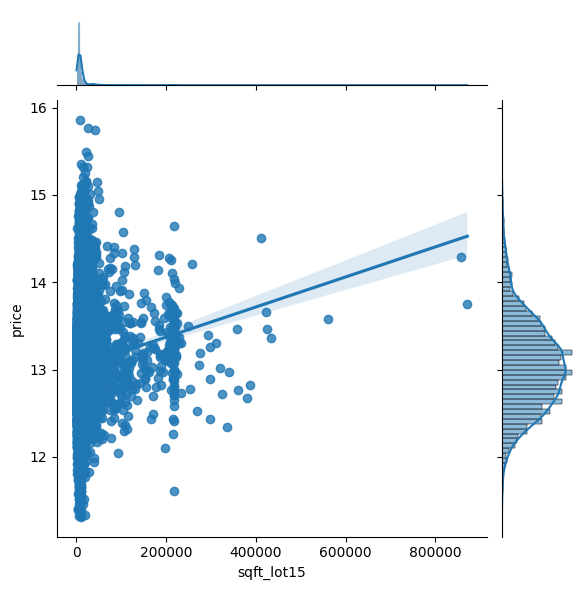

In [44]:
# Define list of continuous variables
cont_feat = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in cont_feat:
    sns.jointplot(x = df[feature], y = df['price'], kind = 'reg')

All features appear somewhat linear. Note that we won't keep all the sqft-type features for our model due to them likely being correlated.

#### Simple linear regression
We will begin with a simple linear regression model, using the single feature of sqft_living which looked to be a good predictor based on satisfying the linearity assumption and being positively correlated with price

In [45]:
dfmod = df.copy()
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = np.array(dfmod['sqft_living']).reshape(-1,1)
y_train = dfmod['price']

In [46]:
# Create model in OLS
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                 1.470e+04
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:44:11   Log-Likelihood:                -6833.3
No. Observations:               15428   AIC:                         1.367e+04
Df Residuals:                   15426   BIC:                         1.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2152      0.008   1624.379      0.000      12.201      12.230
x1             0.0004    3.3e-06    121.251      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.553   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.548
Skew:                           0.015   Prob(JB):                        0.760
Kurtosis:                       3.002   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using a single feature did not provide a strong model.The metric (R**2) indicates that only 49% of the variance can be explained by our model.

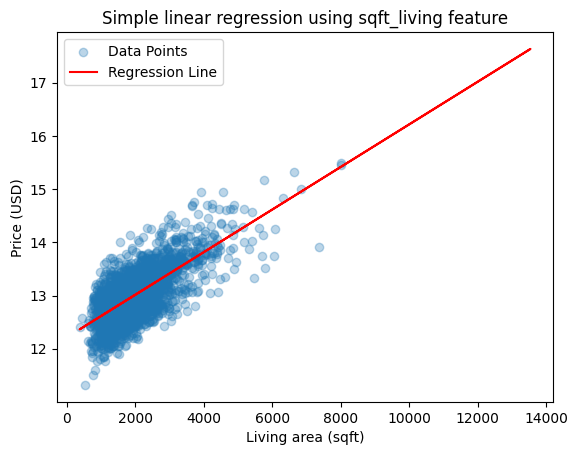

In [55]:
# Create visualisation of simple linear regression

# Get predictions
y_pred = linreg.predict(X_train)
# Plot data points
plt.scatter(x = X_train[:2000], y = y_train[:2000], alpha = 0.3, label = 'Data Points')
# Plot regression line
plt.plot(X_train, y_pred, color = 'red', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using sqft_living feature')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show();

For smaller living areas our model looks decent but as the sqft_living value increases our model's performance declines, to signify that sqft_living is not a good enough predictor for larger houses.